# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells





**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo



# Race Strategy Optimizer


# Case Study and Implementation




In [4]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
import tensorflow as tf
from tensorflow import keras
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import joblib

# The Dataset
> ***Brief Description:***
Motorsport strategy decisions, including pit stop timing and tire selection, are often reactive and rely heavily on human judgment. Studies such as Pit Stop Optimization,  introduced an embedded deep neural network model to predict optimal pit stop strategies in Formula One racing.

This dataset is suited for training a model that predicts the optimal tire compound based on race conditions.


In [5]:
# Load the dataset
df = pd.read_csv("Race_Strategy_Dataset.csv")

# Display the first few rows
df.head()
df.fillna(method='ffill', inplace=True)
data = df.shape
print(data)

# Encode categorical features
label_encoders = {}
categorical_columns = ['Weather', 'Tire_Compound', 'Driving_Style', 'Track_Surface', 'Downforce_Setup', 'Race_Strategy', 'Competitor_Strategy', 'Safety_Car']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later use

#Split Dataset into Training, Validation & Test Set
X = df.drop(columns=['Tire_Compound'])
y = df['Tire_Compound']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")
df.head()

(1000, 11)
Training set: (800, 10), Validation set: (100, 10), Test set: (100, 10)


<ipython-input-5-b5b5ebd21eb0>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Lap,Temperature,Weather,Track_Surface,Downforce_Setup,Driving_Style,Race_Strategy,Safety_Car,Competitor_Strategy,Laps_Remaining,Tire_Compound
0,52,20,3,2,2,0,2,0,2,18,2
1,15,11,1,0,0,1,2,0,1,55,1
2,61,12,0,0,1,0,2,0,2,9,3
3,21,32,2,1,0,0,0,0,0,49,4
4,24,21,0,0,1,2,1,1,2,46,2


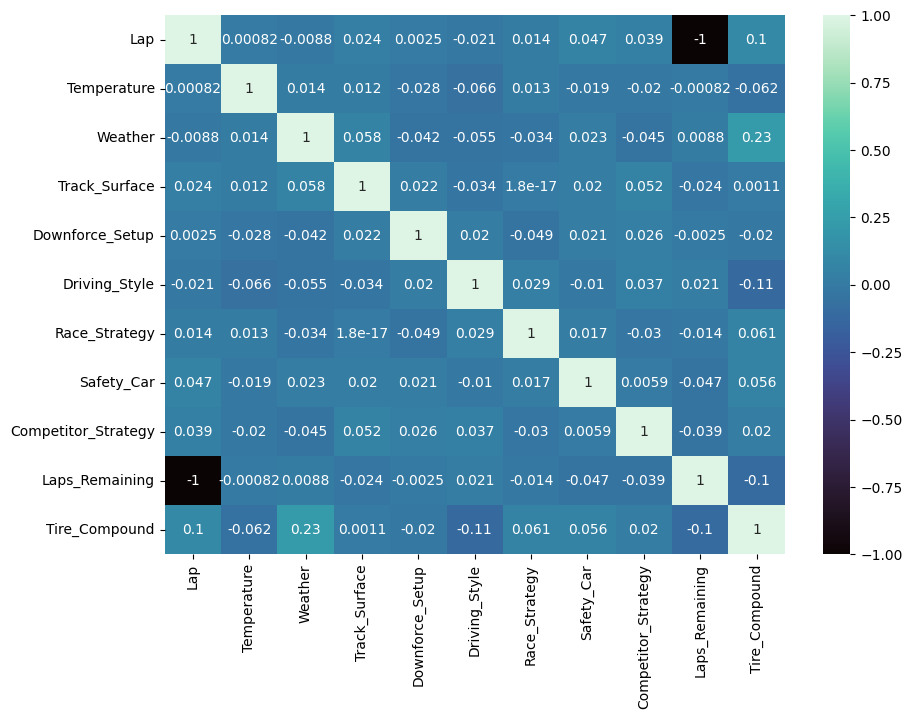

In [6]:
# Plot the heatmap fig
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='mako')
plt.show()

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
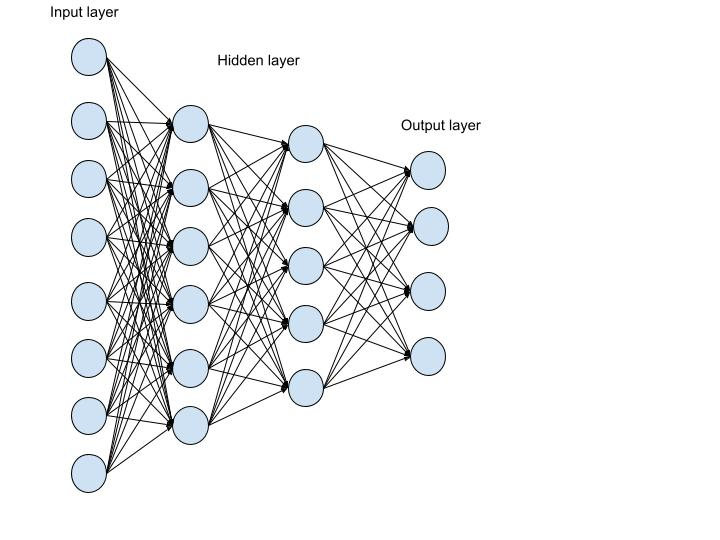



#Task: Define a function that creates models without and With specified Optimization techniques


# Classical ML Model (Logistic Regression)

Logistic Regression Performance:
Accuracy: 0.2900, Precision: 0.2874, Recall: 0.3464, F1-score: 0.2948


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

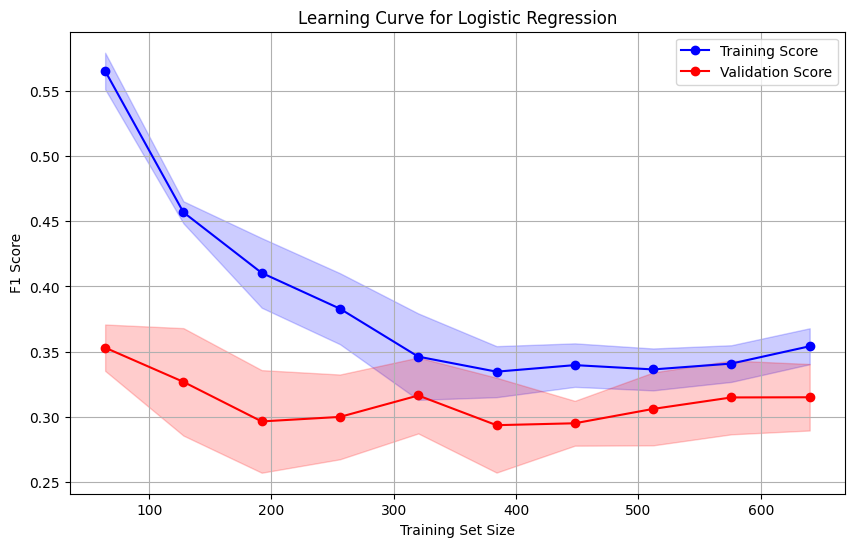

In [7]:
# Define the model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get best model
best_log_reg = grid_search.best_estimator_

# Predictions
y_pred = best_log_reg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print(f"Logistic Regression Performance:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    best_log_reg, X_train, y_train, cv=5, scoring="f1_macro", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation for training & test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Score")

# Fill area with standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

# Labels and title
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.title("Learning Curve for Logistic Regression")
plt.legend(loc="best")
plt.grid()

# Show the plot
plt.show()


# Basic Neural Network

In [17]:
basic_nn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(y.unique()), activation='softmax')
])

basic_nn.summary()

# Compile the model
basic_nn.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Model Definition
def Basic_model(basic_nn, X_train, y_train, X_val, y_val):
    """
    Returns the Basic_NN training history.
    """

    # Train the model
    secondmodel = basic_nn.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,

    )

    return secondmodel

secondmodel = Basic_model(basic_nn, X_train, y_train, X_val, y_val)

y_pred = np.argmax(basic_nn.predict(X_test), axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,949 (11.52 KB)

 Trainable params: 2,949 (11.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2156 - loss: 2.4203 - val_accuracy: 0.1300 - val_loss: 1.7866
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2536 - loss: 1.5834 - val_accuracy: 0.2300 - val_loss: 1.7763
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3330 - loss: 1.4277 - val_accuracy: 0.2300 - val_loss: 1.6481
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3433 - loss: 1.4313 - val_accuracy: 0.2400 - val_loss: 1.5934
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3262 - loss: 1.3796 - val_accuracy: 0.2200 - val_loss: 1.5636
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3648 - loss: 1.3874 - val_accuracy: 0.2700 - val_loss: 1.5953
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3951 - loss: 1.3409 - val_accuracy: 0.2600 - val_loss: 1.5501
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3672 - loss: 1.3819 - val_accuracy: 0.3000 - 

# Plot Graphs

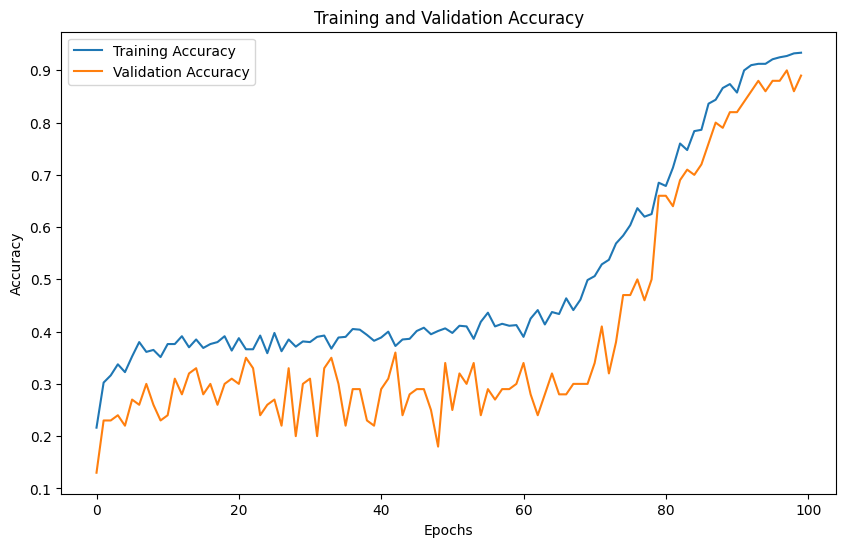

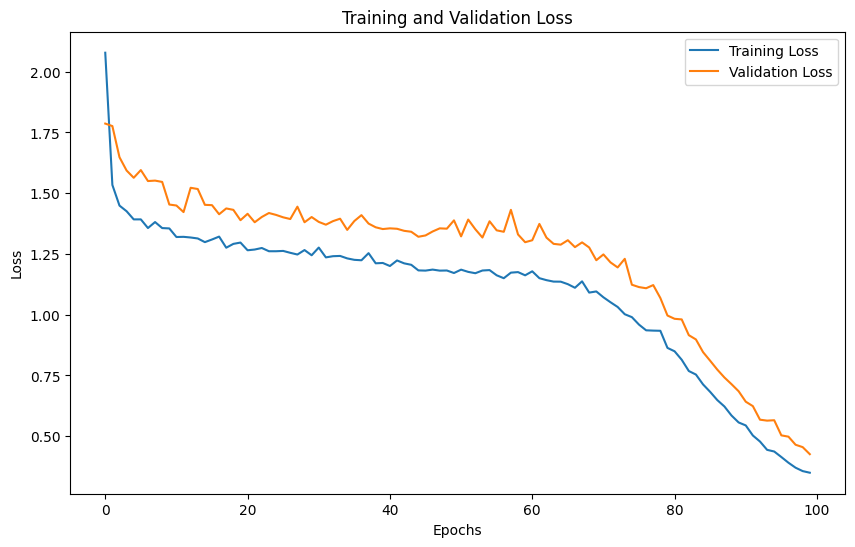

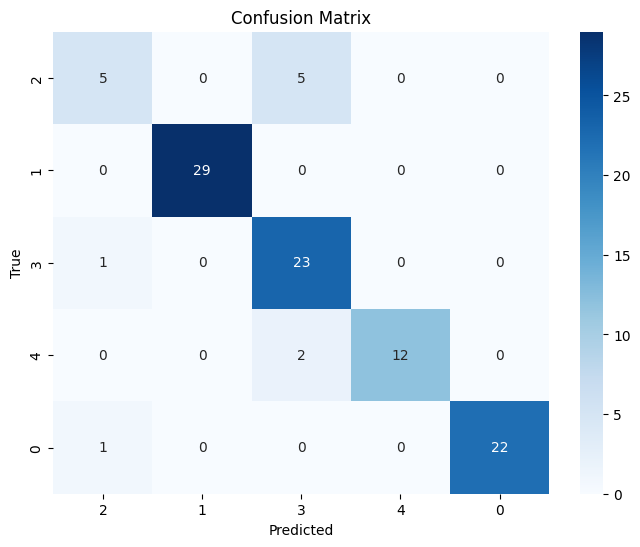

In [18]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(secondmodel.history["accuracy"], label="Training Accuracy")
plt.plot(secondmodel.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(secondmodel.history["loss"], label="Training Loss")
plt.plot(secondmodel.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Third Model:Neural Network with Adam optimizer, L2 Regularization (0.001)

In [19]:
# Model Architecture
third_model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(len(y.unique()), activation='softmax')
])

# Optimizer
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Model Compilation
third_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

third_model.summary()

# Model Definition
from sklearn.utils.class_weight import compute_class_weight
def model_three(third_model, X_train, y_train, X_val, y_val,):
    """
    Returns the training history.
    """
    # Define callbacks
    early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001)

    # Train the model
    thirdd_model = third_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=150,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    return thirdd_model

thirdd_model = model_three(third_model, X_train, y_train, X_val, y_val,)

y_pred = np.argmax(third_model.predict(X_test), axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 5)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,357 (48.27 KB)

 Trainable params: 12,357 (48.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2758 - loss: 2.3091 - val_accuracy: 0.2600 - val_loss: 1.5833 - learning_rate: 0.0100
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2906 - loss: 1.5613 - val_accuracy: 0.3300 - val_loss: 1.6354 - learning_rate: 0.0100
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3303 - loss: 1.5218 - val_accuracy: 0.2500 - val_loss: 1.5641 - learning_rate: 0.0100
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3666 - loss: 1.4529 - val_accuracy: 0.3000 - val_loss: 1.5249 - learning_rate: 0.0100
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3787 - loss: 1.3944 - val_accuracy: 0.3200 - val_loss: 1.5203 - learning_rate: 0.0100
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2774 - loss: 1.4579 - val_accuracy: 0.3300 - val_loss: 1.5066 - learning_rate: 0.0100
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3823 - loss: 1.4037 - val_ac

# Plotted Graphs

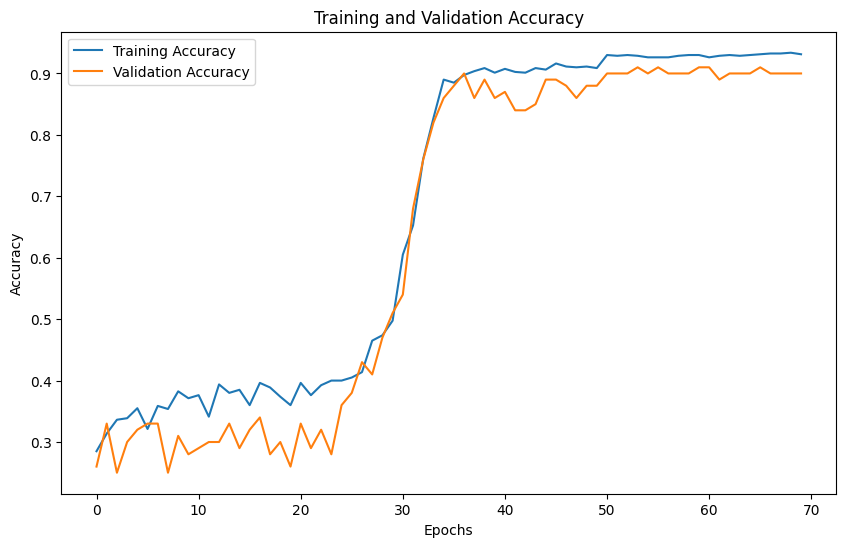

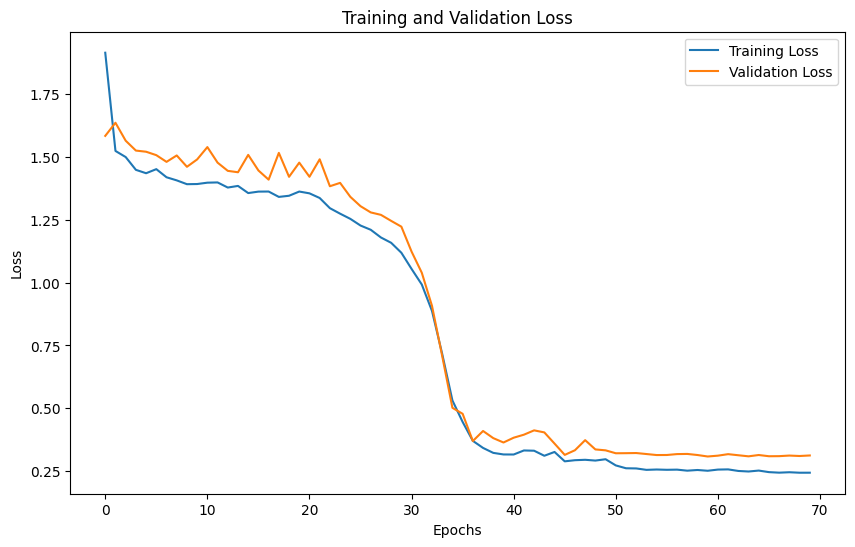

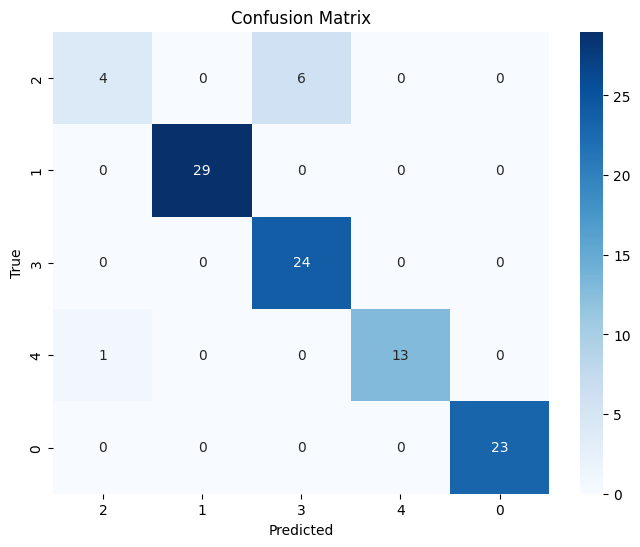

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(thirdd_model.history["accuracy"], label="Training Accuracy")
plt.plot(thirdd_model.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(thirdd_model.history["loss"], label="Training Loss")
plt.plot(thirdd_model.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Forth model: Neural Network with RMSprop Optimization

In [12]:
# Model Architecture
forth_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])

# Optimizer
optimizer = RMSprop(learning_rate=0.005)

# Define Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compilation
forth_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display of the model summary
forth_model.summary()


def model_RMSprop(forth_model, X_train, y_train, X_val, y_val):


    early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001)

    history = forth_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    return history

history = model_RMSprop(forth_model, X_train, y_train, X_val, y_val)

y_pred = np.argmax(forth_model.predict(X_test), axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 5)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,357 (48.27 KB)

 Trainable params: 12,357 (48.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2300 - loss: 3.5339 - val_accuracy: 0.2300 - val_loss: 1.8240 - learning_rate: 0.0050
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2822 - loss: 1.6021 - val_accuracy: 0.2400 - val_loss: 1.7268 - learning_rate: 0.0050
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3069 - loss: 1.5129 - val_accuracy: 0.2800 - val_loss: 1.5601 - learning_rate: 0.0050
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3062 - loss: 1.4756 - val_accuracy: 0.2600 - val_loss: 1.4659 - learning_rate: 0.0050
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3297 - loss: 1.4359 - val_accuracy: 0.2500 - val_loss: 1.4650 - learning_rate: 0.0050
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2900 - loss: 1.4380 - val_accuracy: 0.2800 - val_loss: 1.4335 - learning_rate: 0.0050
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2995 - loss: 1.4223 - val_ac

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Accuracy: 0.9400
Precision: 0.9405
Recall: 0.9400
F1 Score: 0.9348


# Plotted Graphs

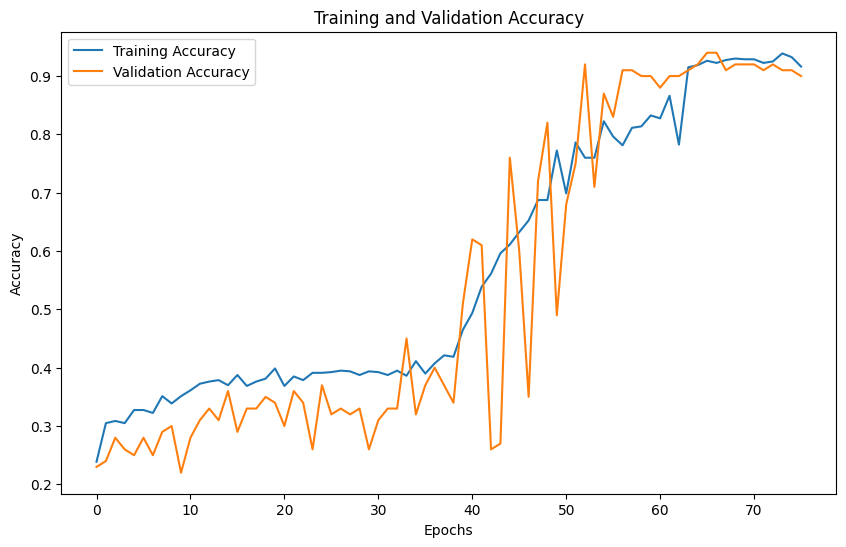

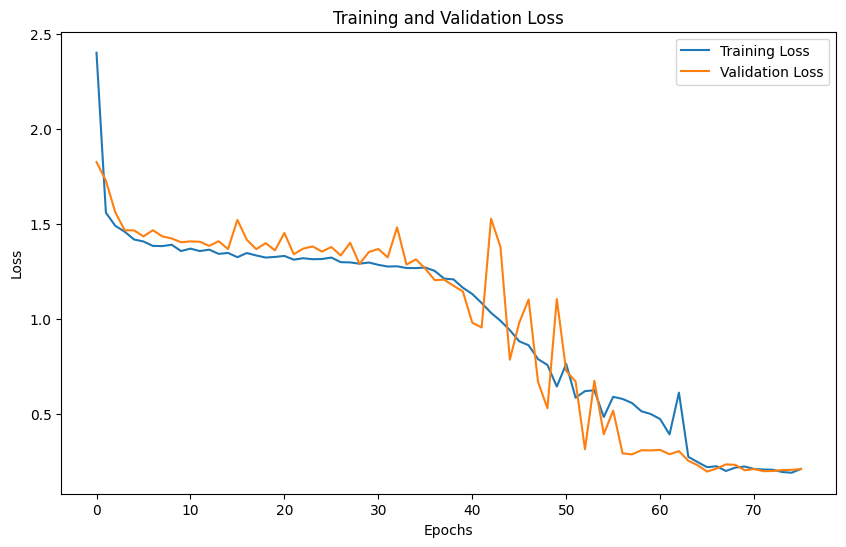

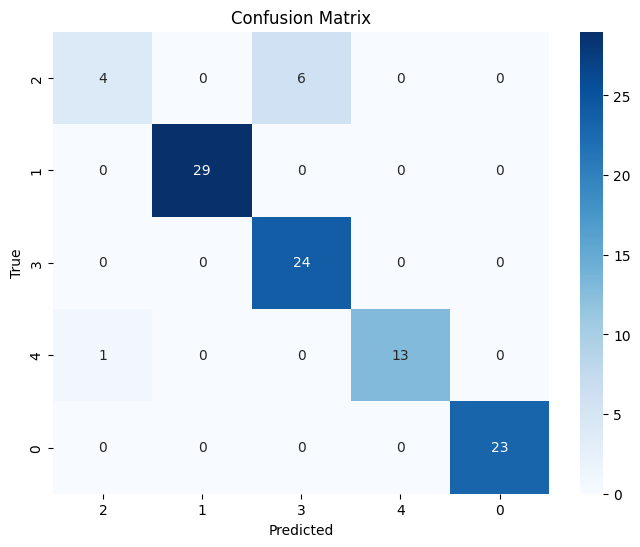

In [21]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Task: Make Predictions using the best saved model


Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [30]:
# Save the model
forth_model.save('forth_model.keras')

import numpy as np
from tensorflow.keras.models import load_model

def make_predictions(model_path, X):
    """
    Load a saved model and make predictions on the given input data.

    Arguments:
    model_path -- Path to the saved model file (string)
    X -- Input data to make predictions on (numpy array or pandas DataFrame)

    Returns:
    predictions -- Predicted class labels
    """
    # Load the model
    model = load_model(model_path)

    # Make predictions (returns probabilities for each class)
    predictions_prob = model.predict(X)

    # Convert probabilities to class labels (multi-class)
    predictions = np.argmax(predictions_prob, axis=-1)

    return predictions

# Example usage:

# Predict on test set
model_path = "/content/forth_model.keras"
predictions = make_predictions(model_path, X_test)

# Predict on a new single data point
new_data = np.array([[5, 28.0, 1, 0, 1, 2, 0, 1, 3, 50]])  # Example input (Early race, warm weather, smooth track)
prediction = make_predictions(model_path, new_data)

print("Predicted Tire Compound:", prediction[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted Tire Compound: 1


    Example Test Cases
    
    [5, 28.0, 1, 0, 1, 2, 0, 1, 3, 50],   # Early race, warm weather, smooth track
    [15, 35.5, 2, 1, 0, 1, 1, 0, 2, 30],  # Mid-race, very hot, slightly rough track
    [40, 18.0, 3, 0, 2, 2, 1, 1, 4, 20],  # Late race, cold, smooth track, high downforce
    [60, 25.0, 0, 1, 1, 3, 2, 0, 1, 10],  # Final laps, normal temp, rough track
    [10, 22.5, 2, 0, 2, 0, 0, 1, 2, 40],  # Early race, cloudy, smooth track, aggressive driving
    [25, 30.0, 1, 1, 0, 1, 2, 0, 3, 25],  # Mid-race, hot, rough track, low downforce
    [50, 20.0, 3, 0, 2, 2, 0, 1, 4, 15],  # Late race, cool weather, defensive strategy


    TYRE Classification
    Soft = 0
    Mediums = 1
    Hards = 2
    Wets = 3
    Intermidiates = 4

Congratulations!!
